In [97]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.util import bigrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import string

In [98]:
# Define the path to the "datasets" folder relative to your current notebook's location.
datasets_folder = "../datasets"

### 1) % of each dataset in the unified dataset

In [99]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_binary.csv"

In [100]:
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

In [101]:
# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi = pd.read_csv(csv_file_path)

In [102]:
# Calculate the total number of "aggressive" and "hate" for all researchers
total_aggressive = df_tupi['aggressive'].sum()
total_hate = df_tupi['hate'].sum()

In [103]:
# Calculate the share percentage of each researcher in terms of "aggressive" and "hate"
grouped_data_tupi = df_tupi.groupby('researcher').agg({
    'aggressive': lambda x: round((x.sum() / total_aggressive) * 100, 0),
    'hate': lambda x: round((x.sum() / total_hate) * 100, 0)
}).reset_index()


In [104]:
# Rename columns for clarity
grouped_data_tupi = grouped_data_tupi.rename(columns={'aggressive': 'aggressive_share_percentage', 'hate': 'hate_share_percentage'})

In [105]:
grouped_data_tupi.head()

,researcher,aggressive_share_percentage,hate_share_percentage
0,fortuna et al,11.0,18.0
1,leite et al,43.0,34.0
2,oliveira et al,15.0,15.0
3,vargas et al,31.0,33.0


### 2) % of each type of hate speech for each researcher

In [106]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"

In [107]:
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

In [108]:
# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

In [109]:
df_tupi_hier =df_tupi_hier[["researcher","hate","ageism","aporophobia","body_shame","capacitism","lgbtphobia","political","racism","religious_intolerance","misogyny","xenophobia","other"]]

In [110]:
# Sum all columns except the "researcher" column
total_hate = df_tupi_hier.drop(columns=['hate','researcher']).sum()

In [111]:
# Group by researcher and calculate the sum of each category
grouped_data_tupi_hier = df_tupi_hier.groupby('researcher').sum()

# Calculate the total hate count
total_hate = grouped_data_tupi_hier[hate_categories].sum(axis=1)

# Calculate the percentage of each type of hate relative to the total hate count
for category in hate_categories:
    grouped_data_tupi_hier[category] = round((grouped_data_tupi_hier[category] / total_hate) * 100, 2)

# Reset the index and select only the percentage columns without the "% of" prefix
grouped_data_tupi_hier = grouped_data_tupi_hier[hate_categories]

NameError: name 'hate_categories' is not defined

In [ ]:
grouped_data_tupi_hier.head()

,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other
researcher,,,,,,,,,,,
fortuna et al,0.21,0.21,8.59,0.31,19.12,4.92,5.55,1.62,47.56,7.12,4.77
leite et al,0.00,0.00,0.00,0.00,6.28,0.00,2.52,0.00,8.45,2.75,80.00
oliveira et al,4.08,4.77,9.31,7.16,7.39,40.88,2.93,2.16,15.94,5.39,0.00
vargas et al,0.00,0.00,0.00,0.00,0.00,77.29,1.18,7.23,14.31,0.00,0.00


### 3) % of each type of hate speech (general)

In [ ]:
# Calculate the total hate count
total_hate = df_tupi_hier[hate_categories].sum()

# Calculate the percentage of each type of hate relative to the total hate count
percentage_data = {}
for category in hate_categories:
    percentage_data[f'{category}'] = round((total_hate[category] / total_hate.sum()) * 100, 2)

# Create a DataFrame with a single row
final_table = pd.DataFrame(percentage_data, index=[0])

In [ ]:
final_table.head()

,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other
0,0.61,0.7,3.04,1.06,8.59,12.27,3.1,1.15,17.88,3.81,47.78


### 4) Bigram with stopwods

In [ ]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

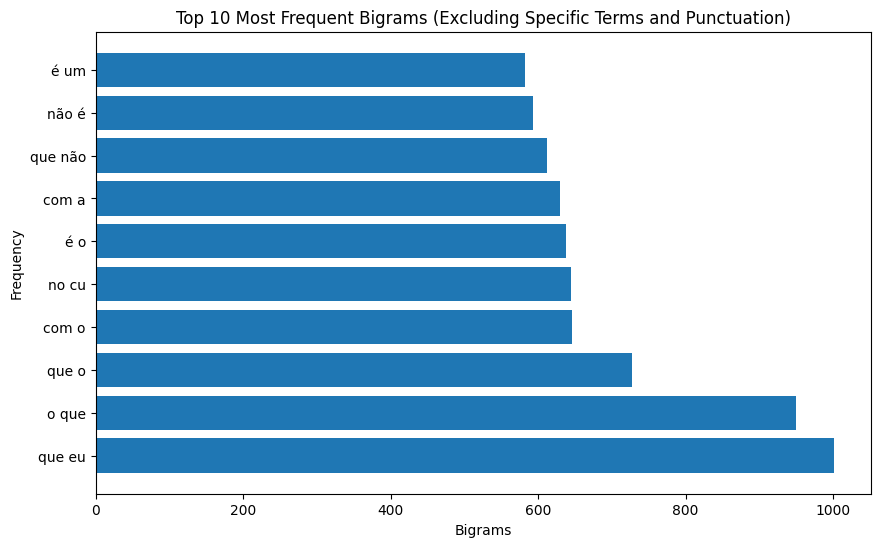

In [ ]:
# Function to tokenize text, excluding specific words
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    
    return tokens

# Apply preprocessing to the 'text' column
df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

# Create bigrams from the preprocessed text
df_tupi_hier['bigrams'] = df_tupi_hier['preprocessed_text'].apply(lambda x: list(bigrams(x)))

# Count the frequency of bigrams
bigram_frequency = Counter()
for bigram_list in df_tupi_hier['bigrams']:
    bigram_frequency.update(bigram_list)

# Get the most frequent bigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

most_common_bigrams = [(b, freq) for b, freq in bigram_frequency.most_common() if all(term not in b and all(char not in b for char in exclude_punctuation) for term in exclude_terms)][:10]

# Unzip bigram and frequency into separate lists and convert bigrams to strings
bigram, frequency = zip(*most_common_bigrams)
bigram = [' '.join(b) for b in bigram]

# Create a chart for the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram, frequency)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Bigrams (Excluding Specific Terms and Punctuation)')
plt.show()

### 4) Bigram without Stop words

In [ ]:
#import nltk
#nltk.download('all')

In [ ]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"

In [ ]:
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

In [ ]:
# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

In [ ]:
# Function to remove stopwords and tokenize text, excluding specific words
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

# Apply preprocessing to the 'text' column
df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

# Create bigrams from the preprocessed text
df_tupi_hier['bigrams'] = df_tupi_hier['preprocessed_text'].apply(lambda x: list(bigrams(x)))


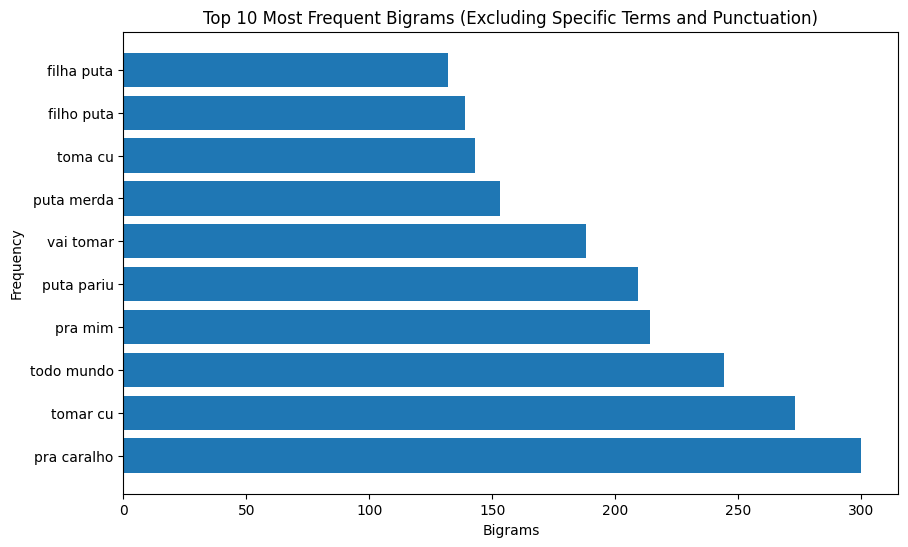

In [ ]:
# Count the frequency of bigrams
bigram_frequency = Counter()
for bigram_list in df_tupi_hier['bigrams']:
    bigram_frequency.update(bigram_list)

# Get the most frequent bigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

most_common_bigrams = [(b, freq) for b, freq in bigram_frequency.most_common() if all(term not in b and all(char not in b for char in exclude_punctuation) for term in exclude_terms)][:10]

# Unzip bigram and frequency into separate lists and convert bigrams to strings
bigram, frequency = zip(*most_common_bigrams)
bigram = [' '.join(b) for b in bigram]

# Create a chart for the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram,frequency)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Bigrams (Excluding Specific Terms and Punctuation)')
#plt.gca().invert_yaxis()
plt.show()


### 4) Trigram without stopwords

In [ ]:
from nltk.util import ngrams

In [ ]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

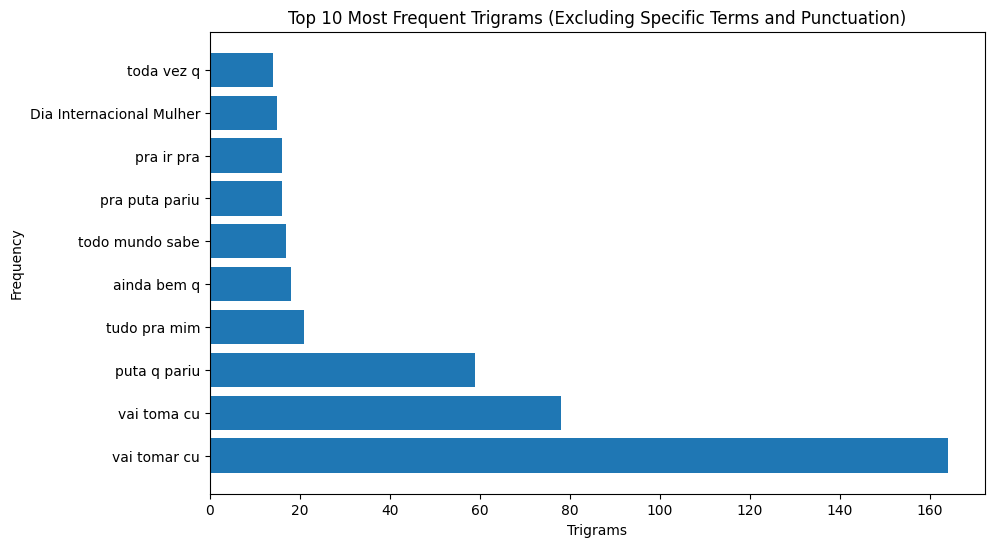

In [ ]:
# Function to remove stopwords and tokenize text, excluding specific words
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

# Apply preprocessing to the 'text' column
df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

# Create trigrams from the preprocessed text
df_tupi_hier['trigrams'] = df_tupi_hier['preprocessed_text'].apply(lambda x: list(ngrams(x, 3)))  # Use ngrams with n=3

# Count the frequency of trigrams
trigram_frequency = Counter()
for trigram_list in df_tupi_hier['trigrams']:
    trigram_frequency.update(trigram_list)

# Get the most frequent trigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

most_common_trigrams = [(t, freq) for t, freq in trigram_frequency.most_common() if all(term not in t and all(char not in t for char in exclude_punctuation) for term in exclude_terms)][:10]

# Unzip trigram and frequency into separate lists and convert trigrams to strings
trigram, frequency = zip(*most_common_trigrams)
trigram = [' '.join(t) for t in trigram]

# Create a chart for the most frequent trigrams
plt.figure(figsize=(10, 6))
plt.barh(trigram, frequency)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Trigrams (Excluding Specific Terms and Punctuation)')
plt.show()


### 5) Frequency

In [ ]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_binary.csv"
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_binary = pd.read_csv(csv_file_path)

In [ ]:
df_tupi_binary.head()

,source,id,text,researcher,year,aggressive,hate
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1


In [ ]:
# Function to remove stopwords and tokenize text, excluding specific words
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

# Apply preprocessing to the 'text' column
df_tupi_binary['preprocessed_text'] = df_tupi_binary['text'].apply(preprocess_text)

# Create bigrams from the preprocessed text
df_tupi_binary['bigrams'] = df_tupi_binary['preprocessed_text'].apply(lambda x: list(bigrams(x)))

In [ ]:
# Get the most frequent bigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

In [ ]:
df_tupi_binary.head()

,source,id,text,researcher,year,aggressive,hate,preprocessed_text,bigrams
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1,"[user, user, user, quanto, vc, pagava, época, ...","[(user, user), (user, user), (user, quanto), (..."
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1,"[user, árabes, vão, chutar, país, ?, ?]","[(user, árabes), (árabes, vão), (vão, chutar),..."
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1,"[user, user, user, user, user, desenhar, expli...","[(user, user), (user, user), (user, user), (us..."
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1,"[user, user, chola, gado, ., quiser, pagar, ba...","[(user, user), (user, chola), (chola, gado), (..."
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1,"[michele, micheque, nao, cartao, bolsonaro, pq...","[(michele, micheque), (micheque, nao), (nao, c..."


/tmp/ipykernel_44065/3703446534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))
/tmp/ipykernel_44065/3703446534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size
/tmp/ipykernel_44065/3703446534.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

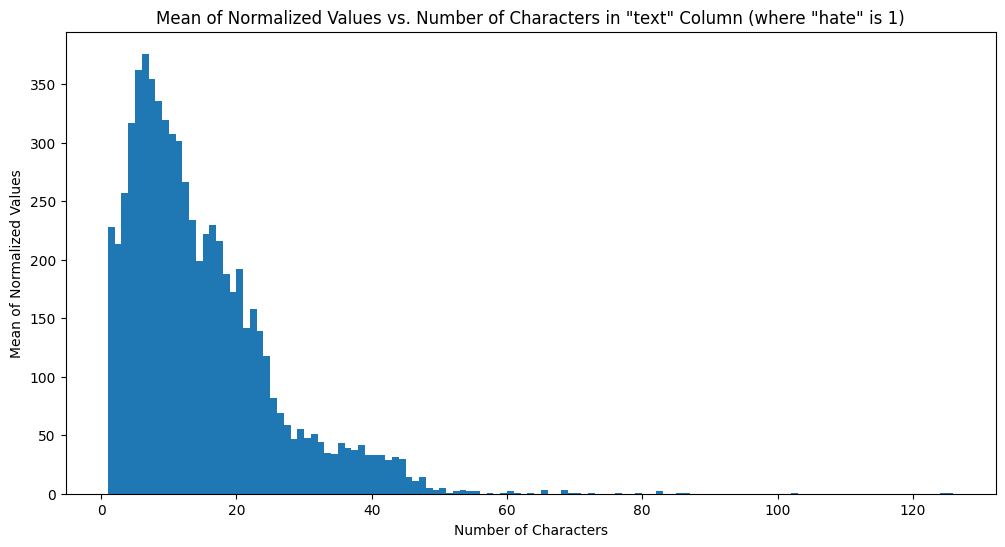

In [ ]:
# Filter the DataFrame for rows where 'hate' is equal to 1
df_filtered = df_tupi_binary[df_tupi_binary['hate'] == 1]

# Calculate the number of unique words in each row of the "text" column
df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))

# Define the bin size (e.g., 50 unique words)
bin_size = 1

# Group the data into bins of a specific number of unique words
df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size

# Create a Min-Max scaler to normalize the data within each bin between 0 and 1
scaler = MinMaxScaler()
df_filtered['unique_words_normalized'] = df_filtered.groupby('bin')['unique_words'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Calculate the mean of the normalized values within each bin
mean_normalized_values = df_filtered.groupby('bin')['unique_words_normalized'].count()

# Create a bar chart with number of characters on the x-axis and mean frequency on the y-axis
plt.figure(figsize=(12, 6))

# Set the bar width to make them contiguous
bar_width = bin_size

# Set the bar alignment to remove gaps
plt.bar(mean_normalized_values.index, mean_normalized_values.values, width=bar_width, align='edge')
plt.xlabel('Number of Characters')
plt.ylabel('Mean of Normalized Values')
plt.title('Mean of Normalized Values vs. Number of Characters in "text" Column (where "hate" is 1)')

# Show the chart
plt.show()

/tmp/ipykernel_44065/2816181455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))
/tmp/ipykernel_44065/2816181455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size
/tmp/ipykernel_44065/2816181455.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

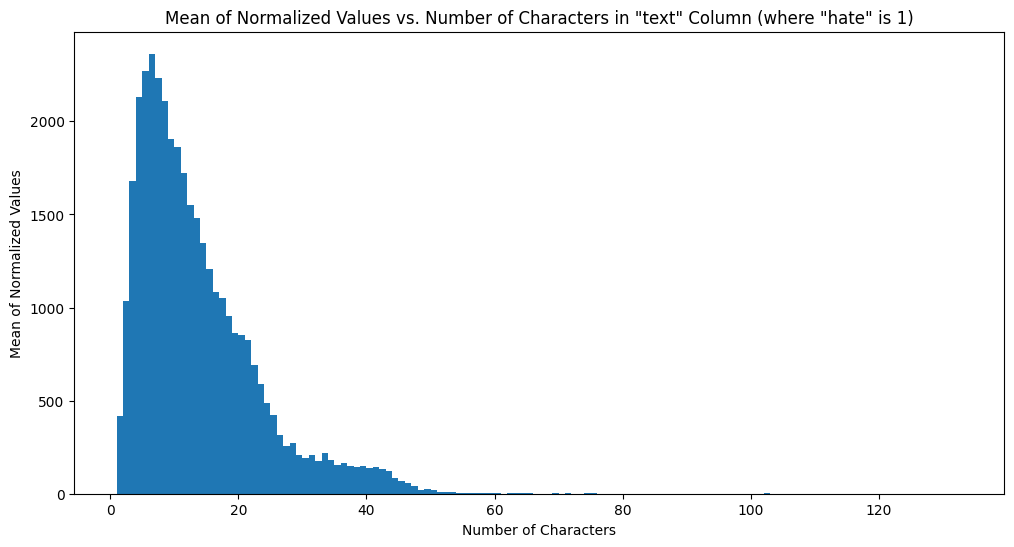

In [ ]:
# Filter the DataFrame for rows where 'hate' is equal to 1
df_filtered = df_tupi_binary[df_tupi_binary['hate'] == 0]

# Calculate the number of unique words in each row of the "text" column
df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))

# Define the bin size (e.g., 50 unique words)
bin_size = 1

# Group the data into bins of a specific number of unique words
df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size

# Create a Min-Max scaler to normalize the data within each bin between 0 and 1
scaler = MinMaxScaler()
df_filtered['unique_words_normalized'] = df_filtered.groupby('bin')['unique_words'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Calculate the mean of the normalized values within each bin
mean_normalized_values = df_filtered.groupby('bin')['unique_words_normalized'].count()

# Create a bar chart with number of characters on the x-axis and mean frequency on the y-axis
plt.figure(figsize=(12, 6))

# Set the bar width to make them contiguous
bar_width = bin_size

# Set the bar alignment to remove gaps
plt.bar(mean_normalized_values.index, mean_normalized_values.values, width=bar_width, align='edge')
plt.xlabel('Number of Characters')
plt.ylabel('Mean of Normalized Values')
plt.title('Mean of Normalized Values vs. Number of Characters in "text" Column (where "hate" is 1)')

# Show the chart
plt.show()